In [1]:
'''
###
Term frequency and Document frequency for EHR medical terms.

Drop the least informative terms (among filter_out) with high relative TF and DF.
Plot the distribution of (collection_frequency/collection) * (patient_frequency/patient).
Return the list of stop words.
###
'''
import os
import csv
import numpy as np

disease_folder = 'autism'
datetime_folder = '2018-10-29-9-55-11'

folder = os.path.expanduser('~/data1/complex_disorders/data/%s/cohorts/%s/' % (disease_folder, datetime_folder))

##Terms to filter, distribution threshold. 
filter_out = ['medication']

with open(os.path.join(folder, 'cohort-vocab.csv')) as f:
    rd = csv.reader(f)
    next(rd)
    lab_vocab = []
    for r in rd:
        lab_vocab.append([r[0], int(r[1])])

with open(os.path.join(folder, 'cohort-ehr.csv')) as f:
    rd = csv.reader(f)
    next(rd)
    ehr_seq = {}
    for r in rd:
        ehr_seq.setdefault(r[0], list()).extend([int(r[1])])

In [2]:
##Compute the collection frequency for each clinical term
coll_freq = []
for lv in lab_vocab:
    counts = [ehr_seq[m].count(lv[1]) for m in ehr_seq]
    doc_freq = len(list(filter(lambda x: x!=0, counts)))
    coll_freq.append([lv[1], sum(counts), doc_freq])

In [3]:
##P(t)*P(t in p), where t is the clinical term and p is a patient
T = sum([len(ehr_seq[m]) for m in ehr_seq])
N = len(ehr_seq)

fr = []
for l in coll_freq:
    tmp = l[1]/T * l[2]/N
    fr.append(tmp)
    l.append(tmp)

In [4]:
coll_freq_sorted = sorted(coll_freq, key=lambda x: x[3]) ##sort by the probability product

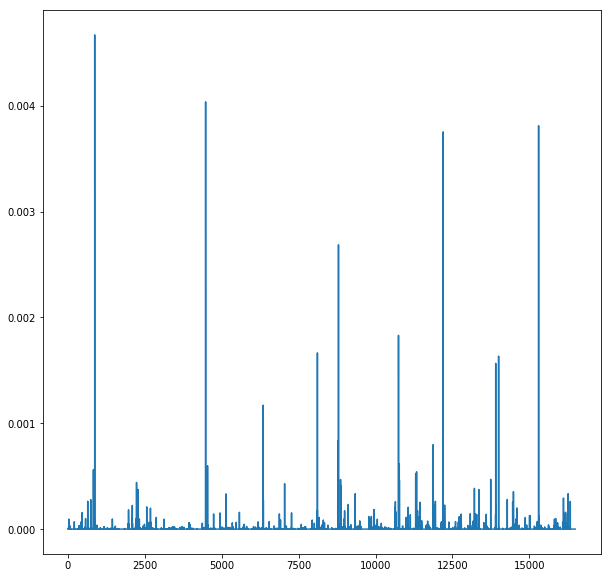

In [5]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,10])
plt.yticks(np.arange(0, 0.1, 0.001))
plt.plot(fr)

In [6]:
thresh = 0.001
stop_words = []
for cfs in reversed(coll_freq_sorted):
    if cfs[3] >= thresh or cfs[3] <= (1/N*1/T):
        print(lab_vocab[cfs[0]-1], cfs[1::])
        for fo in filter_out:
            if lab_vocab[cfs[0]-1][0].find(fo)!=-1:
                stop_words.append(cfs[0])

['icd9::Attention deficit disorder of childhood::314.0::C0004269', 869] [76493, 5372, 0.004670594915184744]
['icd9::Multiple myeloma, in remission::203.01::C0153869', 4474] [129981, 2733, 0.0040376996459280815]
['medication::Sodium chloride nasal spray::374551::C1248637', 15298] [62532, 5364, 0.0038124626055107947]
['medication::Inhalant solution::346161::C1154181', 12197] [55086, 5996, 0.003754199661146071]
['medication::Acetaminophen 80 mg::315270::C0982962', 8793] [38106, 6202, 0.002686207944702412]
['medication::Diphenhydramine hydrochloride::1362::C0004963', 10744] [34468, 4674, 0.001831130500317174]
['icd9::Unspecified erythematous condition::695.9::C0041834', 8108] [33564, 4365, 0.0016652232452235912]
['medication::Oxycodone hydrochloride::82063::C0282274', 13998] [30553, 4707, 0.001634604019728948]
['medication::Ondansetron oral solution::373146::C1247208', 13904] [29767, 4630, 0.0015665005896436661]
['icd9::Personal history of allergy to anesthetic agent::V14.4::n/a', 6342] [1

In [7]:
print("Discard {0} terms".format(len(stop_words)))

Discard 2317 terms


In [8]:
##Write files stop_words.csv and collection_frequencies.csv

with open(os.path.join(folder, 'stop-words.csv'), 'w') as f:
    wr = csv.writer(f, quoting=csv.QUOTE_NONE)
    wr.writerows([stop_words])
    
with open(os.path.join(folder, 'collection-frequencies.csv'), 'w') as f:
    wr = csv.writer(f, quoting=csv.QUOTE_NONE)
    wr.writerow(["EVENT", "COLLECTION_FREQUENCY", "PATIENT_FREQUENCY", "CF*PF"])
    for el in coll_freq:
        wr.writerow(el)